In [ ]:
import pickle
import numpy as np
import tensorflow
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import Circle

In [ ]:
with open('data_hand_pose.pickle','rb') as pickle_file_to_load:
    mydict = pickle.load(pickle_file_to_load)
    
for key in mydict.keys():
    dataset_shape = mydict[key].shape
    dataset_size = dataset_shape[0]
    print(dataset_shape)
    print(key)        
    

(5636, 282, 334, 3)
padded
(5636, 21, 2)
labels
(5636, 4, 1)
blabels


In [ ]:
inputs = mydict['padded']
labels = mydict['labels']
blabels = mydict['blabels']


In [ ]:
blabels = np.reshape(blabels,(blabels.shape[0],blabels.shape[1]*blabels.shape[2]))
print(blabels.shape)

labels = labels.reshape((labels.shape[0],labels.shape[1]*labels.shape[2]))
print(labels.shape)

(5636, 4)
(5636, 42)


In [ ]:
mydict = None

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization

Using TensorFlow backend.


In [ ]:
model = Sequential()

model.add(BatchNormalization())
model.add(Conv2D(32, padding = "VALID", kernel_initializer = 'glorot_uniform', kernel_size = [4,4], strides=[2,2],input_shape=inputs.shape[1:4],activation='relu'))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, padding = "VALID", kernel_initializer = 'glorot_uniform', kernel_size = [4,4], strides=[2,2],input_shape=inputs.shape[1:4],activation='relu'))
model.add(Dropout(0.25))


model.add(BatchNormalization())
model.add(Conv2D(128, padding = "VALID", kernel_initializer = 'glorot_uniform', kernel_size = [4,4], strides=[2,2],input_shape=inputs.shape[1:4],activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(42,activation='relu'))

In [ ]:
model.compile(loss='mse',optimizer=keras.optimizers.Adam(lr=0.0001))


In [ ]:
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 282, 334, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 140, 166, 32)      1568      
_________________________________________________________________
dropout_1 (Dropout)          (None, 140, 166, 32)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 140, 166, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 69, 82, 64)        32832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 69, 82, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 69, 82, 64)       

In [ ]:
testset_size = 1000
model.fit(inputs[: dataset_size - testset_size],labels[: dataset_size - testset_size],epochs=10,batch_size=64,verbose=1,validation_data=(inputs[dataset_size - testset_size :],labels[dataset_size - testset_size :]))

Train on 4636 samples, validate on 1000 samples
Epoch 1/10
4636/4636 [==============================] - 31s 7ms/step - loss: 1460.1656 - val_loss: 2325.8081
Epoch 2/10
4636/4636 [==============================] - 30s 7ms/step - loss: 1187.6203 - val_loss: 757.1278
Epoch 3/10
4636/4636 [==============================] - 32s 7ms/step - loss: 1047.4023 - val_loss: 705.5881
Epoch 4/10
4636/4636 [==============================] - 33s 7ms/step - loss: 942.6291 - val_loss: 477.0737
Epoch 5/10
4636/4636 [==============================] - 31s 7ms/step - loss: 839.1053 - val_loss: 444.8839
Epoch 6/10
4636/4636 [==============================] - 32s 7ms/step - loss: 797.8484 - val_loss: 377.3842
Epoch 7/10
4636/4636 [==============================] - 32s 7ms/step - loss: 726.4096 - val_loss: 362.8462
Epoch 8/10
4636/4636 [==============================] - 31s 7ms/step - loss: 678.0736 - val_loss: 412.3264
Epoch 9/10
4636/4636 [==============================] - 32s 7ms/step - loss: 650.7916 - val_

In [ ]:
model.save('modelim.h5')

# from tensorflow import keras
# model = keras.models.load_model('path/to/location')

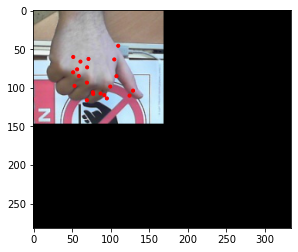

In [ ]:
randomsayi = random.randint(dataset_size - testset_size,dataset_size)

preds = model.predict(inputs[randomsayi:randomsayi+1])

fig, ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(inputs[randomsayi])

for xx, yy in preds[0].reshape((21,2)):
    circ = Circle((xx,yy),2,color='red')
    ax.add_patch(circ)
    